<a href="https://colab.research.google.com/github/jubaljacob/K-means-and-Hierarchial-Clustering/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [13]:
df = pd.read_csv("Mall_Customers.csv")
X = df.iloc[:,[3,4]].values
print(X[:10])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]


In [12]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder="passthrough")
# X = np.array(ct.fit_transform(X))
# print(X[:10])

# Using Elbow method to find optimal number of clusters

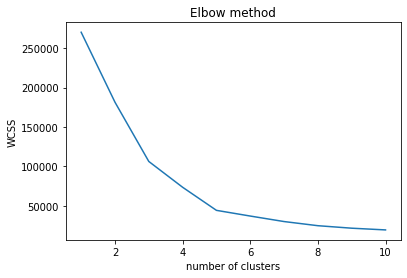

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = "k-means++", random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Elbow method")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

# Training the K-Means Model on the dataset

In [15]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [17]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


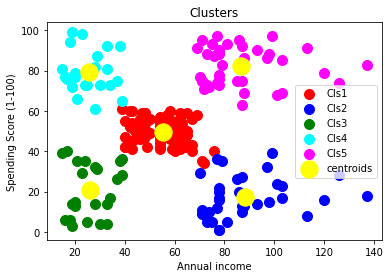

In [20]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1], s=100, c='red', label = 'Cls1' )
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1], s=100, c='blue', label = 'Cls2' )
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1], s=100, c='green', label = 'Cls3' )
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1], s=100, c='cyan', label = 'Cls4' )
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1], s=100, c='magenta', label = 'Cls5' )
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300 , c="yellow", label = 'centroids')
plt.title("Clusters")
plt.xlabel("Annual income")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [23]:
# plt.scatter(X[:,0] , X[:,1] , c=y_kmeans , cmap='rainbow')
# plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1], marker='s' , s=100)
# plt.xlabel('Annual Income (k$)' , fontsize=16)
# plt.ylabel('Spending Score(1-100)' , fontsize=16)
# plt.title('KMeans Clustering' , fontsize=20)
# plt.legend()
# plt.show()

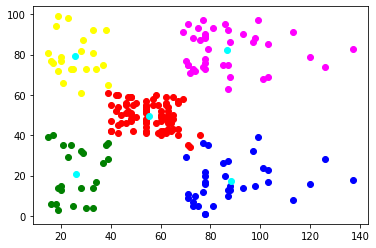

In [26]:
y_set = set(y_kmeans)
colors = ('red','blue','green','yellow','magenta')
for i in y_set:
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], color = colors[i])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="cyan")
plt.show()

In [31]:
# df['cluster'] = y_kmeans
# plt.figure(figsize=(10,8))
# sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
# plt.title('Clusters of customers')
# plt.show()